
This dataset is :"Netflix Movies and TV Shows", which are the listings of movies and tv shows on Netflix
I found it from www.kaggle.com.  
Dataset source:https://www.kaggle.com/datasets/shivamb/netflix-shows  
License:https://creativecommons.org/publicdomain/zero/1.0/  
File size: 3260 kb  

## Column Description

show_id: a unique identifier for each title  
type: indicates whether the title is a movie or TV show  
title: the name of the title  
director: the name of the director(s) of the title (if applicable)  
cast: the names of the main cast members (if applicable)  
country: the country or countries where the title was produced  
date_added: the date the title was added to Netflix  
release_year: the year the title was released  
rating: the TV rating or movie rating (if applicable)  
duration: the length of the title in minutes or seasons  
listed_in: the categories that the title belongs to (e.g., dramas, comedies)  
description: a brief description of the title  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Yunan/Desktop/IS445/Netflix.csv',encoding='latin1')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [5]:
# Define a custom color palette
custom_palette = ['#C0392B', '#1F1F21']

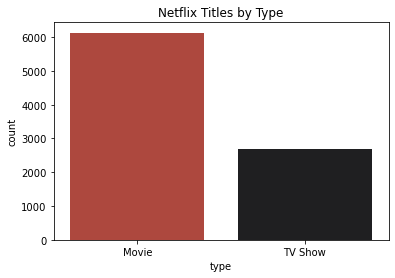

In [6]:

# Create a countplot of the type column with custom colors
sns.countplot(x='type', data=df, palette=custom_palette)
plt.title('Netflix Titles by Type')
plt.show()

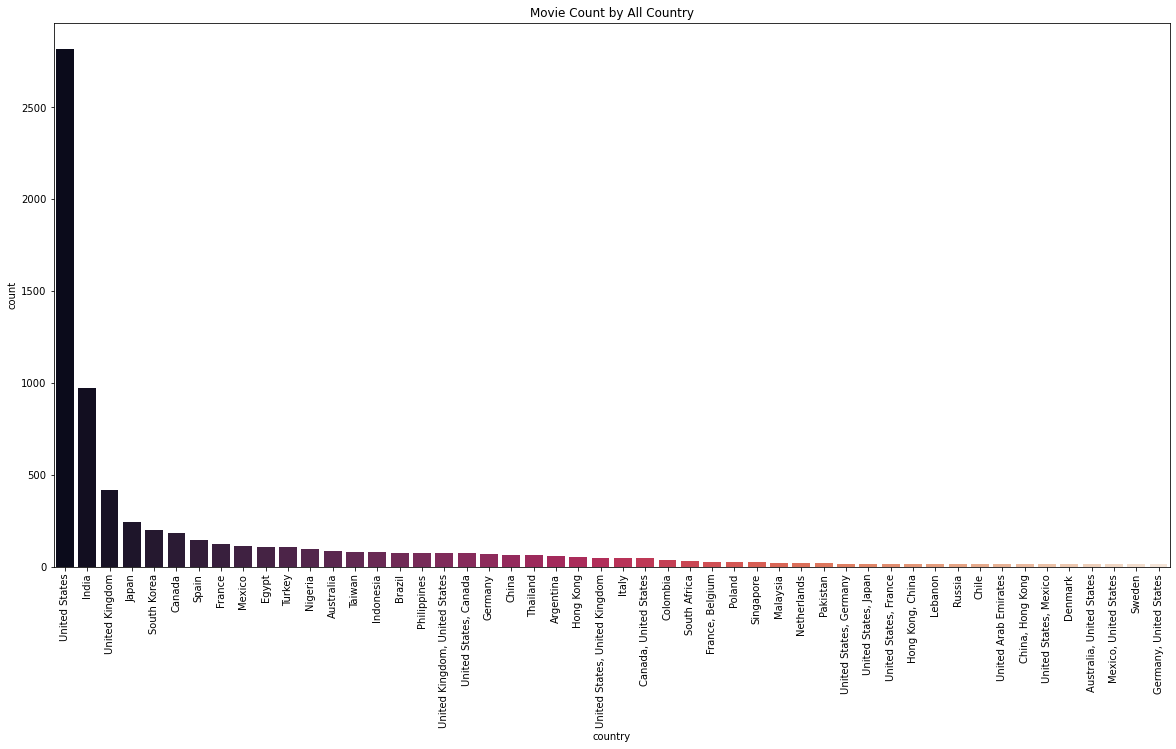

In [7]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['country'] ,palette='rocket',order=df['country'].value_counts().index[0:50])
plt.title('Movie Count by All Country')
plt.show()

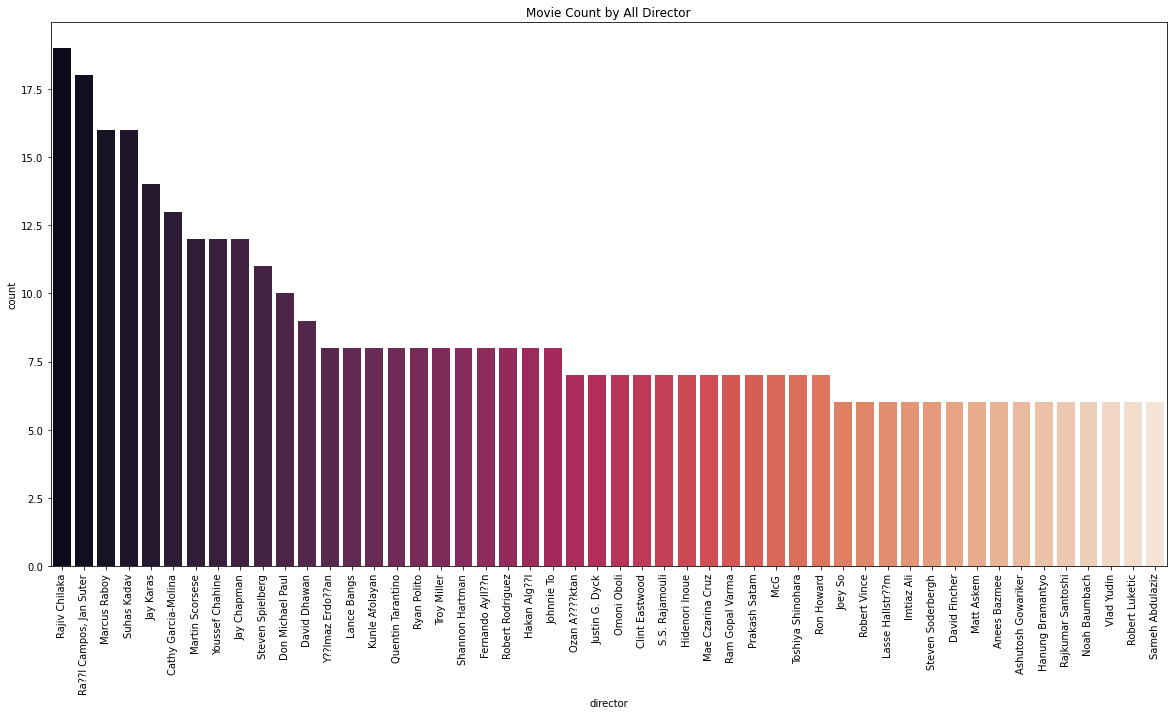

In [8]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['director'] ,palette='rocket',order=df['director'].value_counts().index[0:50])
plt.title('Movie Count by All Director')
plt.show()

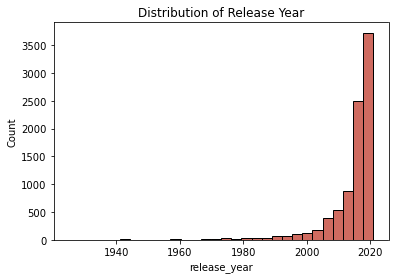

In [9]:
# Create a histogram of the release_year column with custom colors
sns.histplot(x='release_year', data=df, bins=30, color=custom_palette[0])
plt.title('Distribution of Release Year')
plt.show()


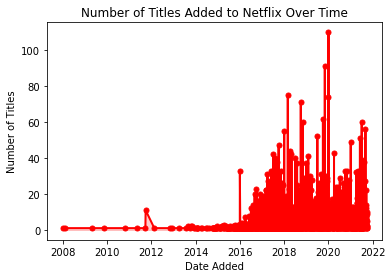

In [10]:
#line plot of the number of titles added to Netflix over time
df['date_added'] = pd.to_datetime(df['date_added'])

title_counts_by_date = df.groupby('date_added')['show_id'].count().reset_index()
# Create line plot with red line and green markers
plt.plot(title_counts_by_date['date_added'], title_counts_by_date['show_id'], color='red', marker='o', markersize=5, linewidth=2)

plt.fill_between(title_counts_by_date['date_added'], title_counts_by_date['show_id'], alpha=0.2, color='red')
plt.title('Number of Titles Added to Netflix Over Time')
plt.xlabel('Date Added')
plt.ylabel('Number of Titles')

plt.show()

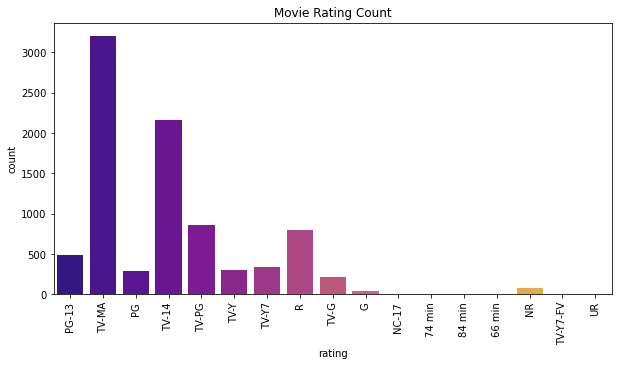

In [11]:
a,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df, x="rating", palette="plasma", ax=ax)
plt.xticks(rotation=90)
plt.title('Movie Rating Count')
plt.show()

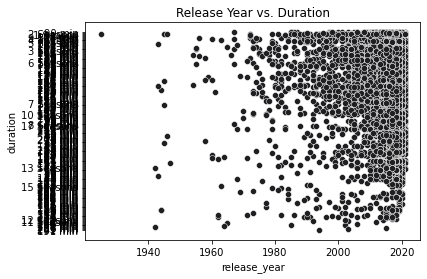

In [12]:
# Create a scatterplot of the release_year and duration columns with custom colors
sns.scatterplot(x='release_year', y='duration', data=df, color=custom_palette[1])
plt.title('Release Year vs. Duration')
plt.show()